In [1]:
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
o = torch.tensor([0., 0., 1.])

H = 400
W = 400
focal_length = 1200

u, v = np.meshgrid(np.arange(W), np.arange(H))
u = u.reshape(-1).astype(np.float32)
v = v.reshape(-1).astype(np.float32)

rays_d = np.stack((u - W / 2., 
                   -(v - H / 2.), 
                   - np.ones_like(u) * focal_length),
                  axis=-1)
rays_d = rays_d / np.linalg.norm(rays_d, axis=-1, keepdims=True)
rays_o = np.tile(o, (rays_d.shape[0], 1)) # (H*W, 3)

In [3]:
def plot_rays(o: np.array, d: np.array, t: float):
    fig = plt.figure(figsize=(12, 12))
    ax = plt.axes(projection='3d')
    
    pt1 = o
    pt2 = o + t * d
    for p1, p2 in tqdm(zip(pt1[::100], pt2[::100])):
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]])
        
    plt.show()

1600it [00:00, 1794.36it/s]


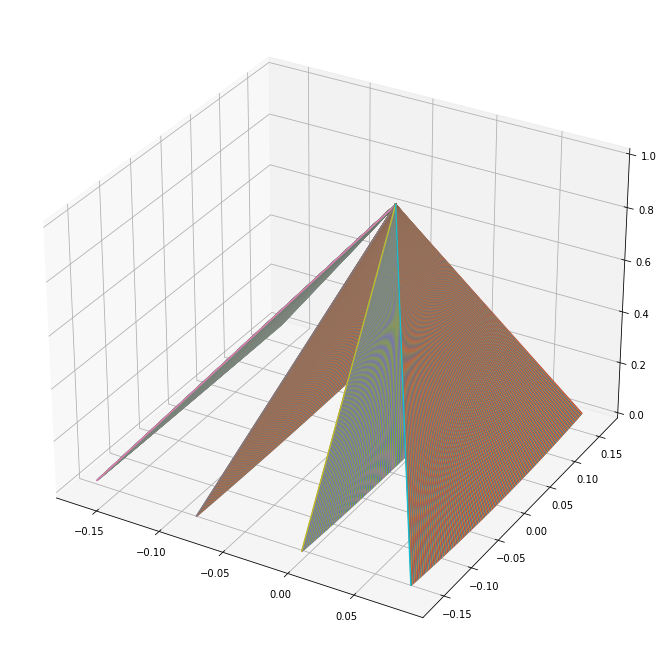

In [4]:
plot_rays(rays_o, rays_d, 1)

In [5]:
class Sphere():
    
    def __init__(self, p, r, c):
        self.p = p
        self.r = r
        self.c = c
        
    def intersect(self, o, d):
        
        # Solve equation at^2 + bt + c = 0
        # (ox + t * dx  - xc)^2 + (oy + t * dy-yc)^2 + (oz + t * dz-zc)^2 = r^2 
        a = d[:, 0]**2 + d[:, 1]**2 + d[:, 2]**2
        b = 2 * ((d[:, 0] * (o[:, 0] - self.p[0])) + (d[:, 1] * (o[:, 1] - self.p[1])) + (d[:, 2] * (o[:, 2] - self.p[2])))
        c = (o[:, 0] - self.p[0])**2 + (o[:, 1] - self.p[1])**2 + (o[:, 2] - self.p[2])**2 - self.r**2
        
        pho = b**2 - 4 * a * c
        cond = pho >= 0
        
        num_rays = o.shape[0]
        colors = np.zeros((num_rays, 3))
        colors[cond] = self.c
        
        return colors

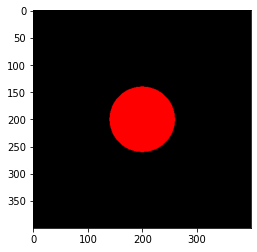

In [6]:
s = Sphere(np.array([0., 0., -1.]), .1, np.array([1., 0., 0.]))
img = s.intersect(rays_o, rays_d)
img = img.reshape(H, W, 3)

plt.figure()
plt.imshow(img)
plt.show()